In [107]:
import scipy as sp
from scipy.optimize import minimize
f=lambda x: x**2+6*x+9
res=minimize(f, 2)


In [ ]:

f=lambda vars: (vars[0]-1)**2+(vars[1]-2.5)**2
cons=(
    {'type': 'ineq', 'fun': lambda vars: vars[0]-2*vars[1]+2},
    {'type': 'ineq', 'fun': lambda vars: -vars[0]-vars[1]+6}, 
    {'type': 'ineq', 'fun': lambda vars: -vars[0]+2*vars[1]+2})
bnds=((0, None), (0, None))
res=minimize(f, (3, 4), constraints=cons, bounds=bnds)


In [28]:

import numpy as np
from scipy.integrate import quad
def f(A):
    integrand=lambda t: 5*np.sqrt(1+(np.pi*A/10)**2*(np.cos(np.pi*t/10))**2)+2/(A*np.sin(np.pi*t/10)+100)**2
    return quad(integrand, 0, 10)[0]
minimize(f, 0.0001).x


array([1.03700352e-05])

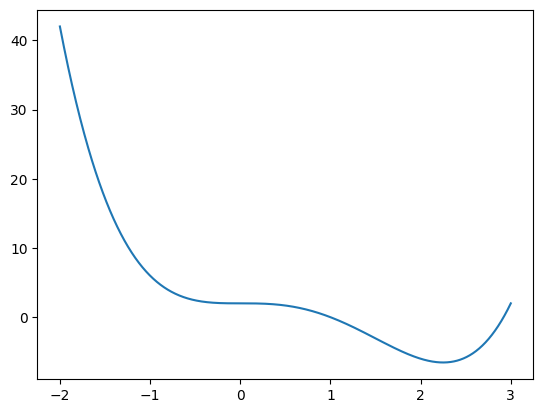

In [ ]:
import matplotlib.pyplot as plt
f=lambda x : x**4-3*x**3+2
bnds=((-2, 3))
res=minimize(f, 1)
res.x
a=np.linspace(-2, 3, 1000)
plt.plot(a, f(a))


array(0.2020202)

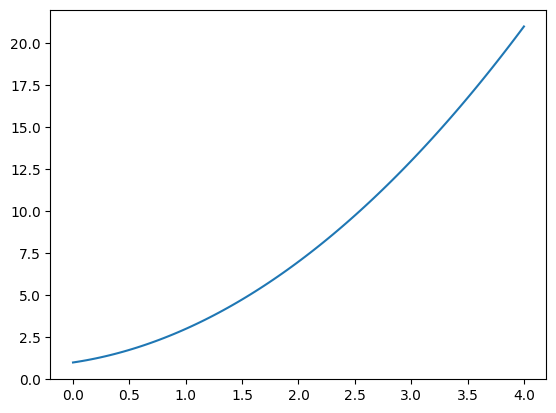

In [ ]:
x=[0,1,2,3,4]
y=[1,3,7,13,21]
from scipy.interpolate import interp1d
f=interp1d(x, y, kind='quadratic')
x1=np.linspace(0, 4, 100)
plt.plot(x1, f(x1))
f(2.5)
dv=np.gradient(f(x1))
fd=interp1d(x1, dv)
fd(2)


In [ ]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2.1, 3.9, 6.8, 11.1, 16.2])
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*x**2+b*x+c
popt, pcov=curve_fit(func, x, y, p0=(2, 0.1, 0))
popt


array([0.53571429, 0.34714285, 1.07142857])

In [73]:
from scipy.integrate import quad
def integrand(x):
    return 0.53571429*x**2+0.34714285*x+1.07142857
integral, integral_error=quad(integrand, 1, 4)
integral


17.067857175

In [ ]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2.7, 5.8, 10.1, 17.2])
f=interp1d(x, y, kind='cubic')
integral, integral_error=quad(f, 0, 3)
integral


13.668749999789071

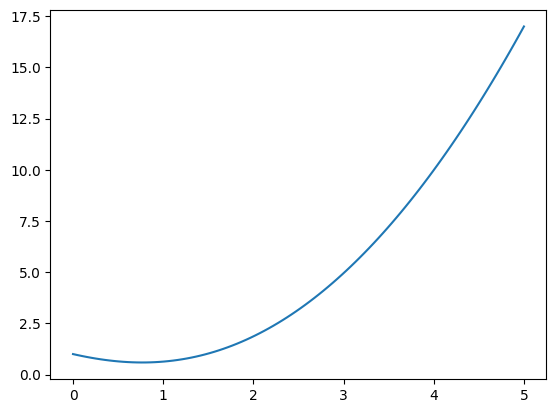

In [99]:
from scipy.integrate import odeint
def dydx(y, x):
    return x**2-y
y0=1
x_values=np.linspace(0, 5, 100)
sol=odeint(dydx, y0, x_values).T[0]
plt.plot(x_values, sol)


In [ ]:
from scipy.optimize import minimize
def func(x):
    return np.exp(-x)*np.sin(3*x)
bnds=[(0, 5)]
res=minimize(func, 4, bounds=bnds)
from scipy.integrate import quad
integral, integral_error=quad(func, 0, 2)
res


  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -0.21953877736272956
        x: [ 1.464e+00]
      nit: 3
      jac: [ 3.747e-07]
     nfev: 24
     njev: 12
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

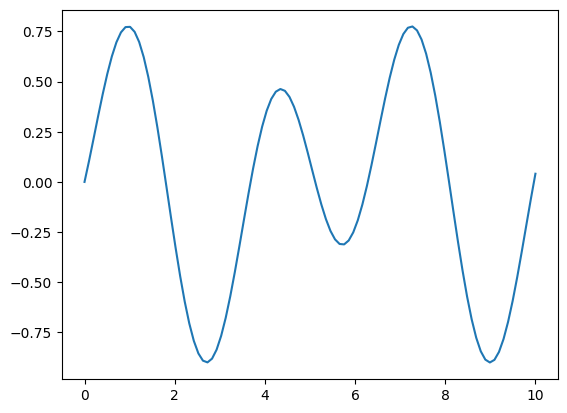

In [130]:
from scipy.integrate import odeint
def dSdx(S, x):
    y, w=S
    return [w, np.cos(x)-4*y]
y0=0
w0=1
S0=(y0, w0)
x_values=np.linspace(0, 10, 100)
res=odeint(dSdx, S0, x_values).T
plt.plot(x_values, res[0])


In [ ]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1.1, 2.5, 4.8, 8.4, 13.2])
def func(x, a, b, c):
    return a*np.exp(b*x)+c
popt, pcov=curve_fit(func, x, y)
popt


array([ 3.30685073,  0.38662566, -2.28258116])

In [150]:
def func(S, x):
    y, vel=S
    return [vel, -9.8]
x_values=np.linspace(0, 5, 100)
y0=100
res=odeint(func, (100, 20), x_values).T
inter=interp1d(res[0], x_values, kind='cubic', fill_value='extrapolate')
ground_time=inter(0)
ground_time


array(7.69004753)

array(1.31113173)

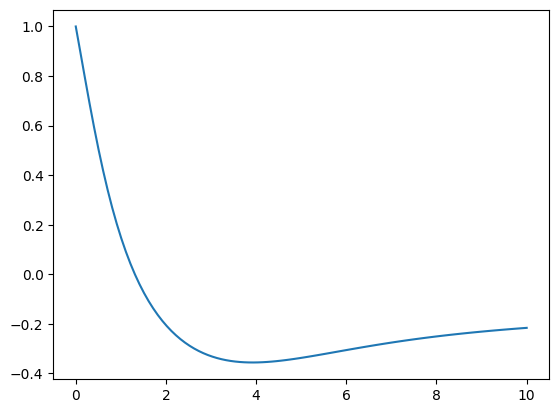

In [ ]:
def func(S, x):
    y1, y2=S
    return [y2, -y2*np.cos(y1)-y1**3]
x_values=np.linspace(0, 10, 100)
S=(1, -1)
res=odeint(func, S, x_values).T
inter=interp1d(res[0], x_values, kind='cubic', fill_value='extrapolate')
ans=inter(0)
plt.plot(x_values, res[0])
ans


In [172]:
def func(x):
    x1, x2=x
    return (x1-2)**4+(x2-3)**2*np.exp(-x1)
res=minimize(func, (0, 0))
res.x


array([1.99508622, 2.99997566])